# <h1><center>AMSGrad</center></h1>

## Methods from scratch and examples

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

### ADAM

In [ ]:
class Adam:
    def __init__(self, weights, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights

    def update(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta

### AMSGRAD

In [ ]:
class AMSGrad:
    def __init__(self, weights, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v, self.v_max = 0, 0
        self.t = 0
        self.theta = weights

    def update(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        new_v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        # main difference between adam and amsgrad in determining v
        self.v_max = max(new_v, self.v_max)
        self.v = new_v
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(self.v_max) - self.epsilon))
        return self.theta

### Simple example of the minimizing $Loss(x) = (x-3)^2$

In [ ]:
def loss_function(x):
    return (x - 3)**2
## take derivative
def grad_function(x):
    return 2*(x - 3)
def check_convergence(w0, w1):
    return (w0 == w1)

In [ ]:
w_0 = 0
adam = Adam(w_0)
t = 1
converged = False

while not converged:
    dw = grad_function(w_0)
    w_0_old = w_0
    w_0= adam.update(dw)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.010000000016666667
iteration 2: weight=0.01999911579256187
iteration 3: weight=0.029996756103855084
iteration 4: weight=0.039992330112340255
iteration 5: weight=0.04998524869850775
iteration 6: weight=0.059974925771337124
iteration 7: weight=0.06996077954487423
iteration 8: weight=0.07994223377220276
iteration 9: weight=0.08991871892809922
iteration 10: weight=0.09988967333245409
iteration 11: weight=0.1098545442074287
iteration 12: weight=0.11981278866227946
iteration 13: weight=0.12976387460079697
iteration 14: weight=0.1397072815473525
iteration 15: weight=0.14964250138860027
iteration 16: weight=0.15956903902892935
iteration 17: weight=0.1694864129587747
iteration 18: weight=0.17939415573586562
iteration 19: weight=0.1892918143803983
iteration 20: weight=0.19917895068595498
iteration 21: weight=0.2090551414487438
iteration 22: weight=0.2189199786183968
iteration 23: weight=0.2287730693741329
iteration 24: weight=0.23861403613056556
iteration 25: weight=0.24844

In [ ]:
w_0 = 0
amsgrad = AMSGrad(w_0)
converged = False

while not converged:
    dw = grad_function(w_0)
    w_0_old = w_0
    w_0 = adam.update(dw)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 2105: weight=3.007130161571545
iteration 2106: weight=3.013534005227851
iteration 2107: weight=3.019268540474425
iteration 2108: weight=3.024386680924335
iteration 2109: weight=3.028937529008109
iteration 2110: weight=3.032966640923177
iteration 2111: weight=3.036516273253245
iteration 2112: weight=3.039625612569046
iteration 2113: weight=3.0423309892161137
iteration 2114: weight=3.044666076400619
iteration 2115: weight=3.046662075599174
iteration 2116: weight=3.048347889241532
iteration 2117: weight=3.0497502815452218
iteration 2118: weight=3.0508940283173667
iteration 2119: weight=3.0518020564805988
iteration 2120: weight=3.0524955740263753
iteration 2121: weight=3.0529941910496854
iteration 2122: weight=3.053316032473599
iteration 2123: weight=3.053477843030027
iteration 2124: weight=3.0534950850240796
iteration 2125: weight=3.053382029373263
iteration 2126: weight=3.053151840379185
iteration 2127: weight=3.05281665465826
iteration 2128: weight=3.052387654628883
iteration 

### Synthetic example from article, where adam fails to converges, AMSGrad solves this problem

We want to solve an online optimization problem:
$$
f_t(x) =
  \begin{cases}
    1010x, & \text{if   $t \mod 101 = 1$} \\
    -10x, & \text{otherwise}
  \end{cases} \\
  x \in [-1,1]
$$
True solution is $x_0 = -1$, let's look at the performance of ADAM and AMSGrad.

In [ ]:
def f_grad(x, t):
  if t % 101 == 1 :
    return (1010*x, 1010)
  else :
    return (-10*x, -10)

In [ ]:
x_0 = 0
x_new = 0
adam = Adam(beta2 = 0.99, weights = x_0)
ams = AMSGrad(beta2 = 0.99, weights = x_0)
N = 120000

x_adam = []
x_ams = []
f_adam = []
f_ams = []

f_sol = 10

#adam
for i in range(1,N+1):
  func = f_grad(x_0, i)
  f_adam.append(func[0] - f_sol)
  x_adam.append(x_0)
  x_new = adam.update(func[1])
  #clamping due to the constraints
  if x_new > 1 :
    x_new = 1
  elif x_new < -1 :
    x_new = -1
  x_0 = x_new

#amsgrad
x_0 = 0
x_new = 0
for i in range(1,N+1):
  func = f_grad(x_0, i)
  f_ams.append(func[0] - f_sol)
  x_ams.append(x_0)
  x_new = ams.update(func[1])
  #clamping due to the constraints
  if x_new > 1 :
    x_new = 1
  elif x_new < -1 :
    x_new = -1
  x_0 = x_new

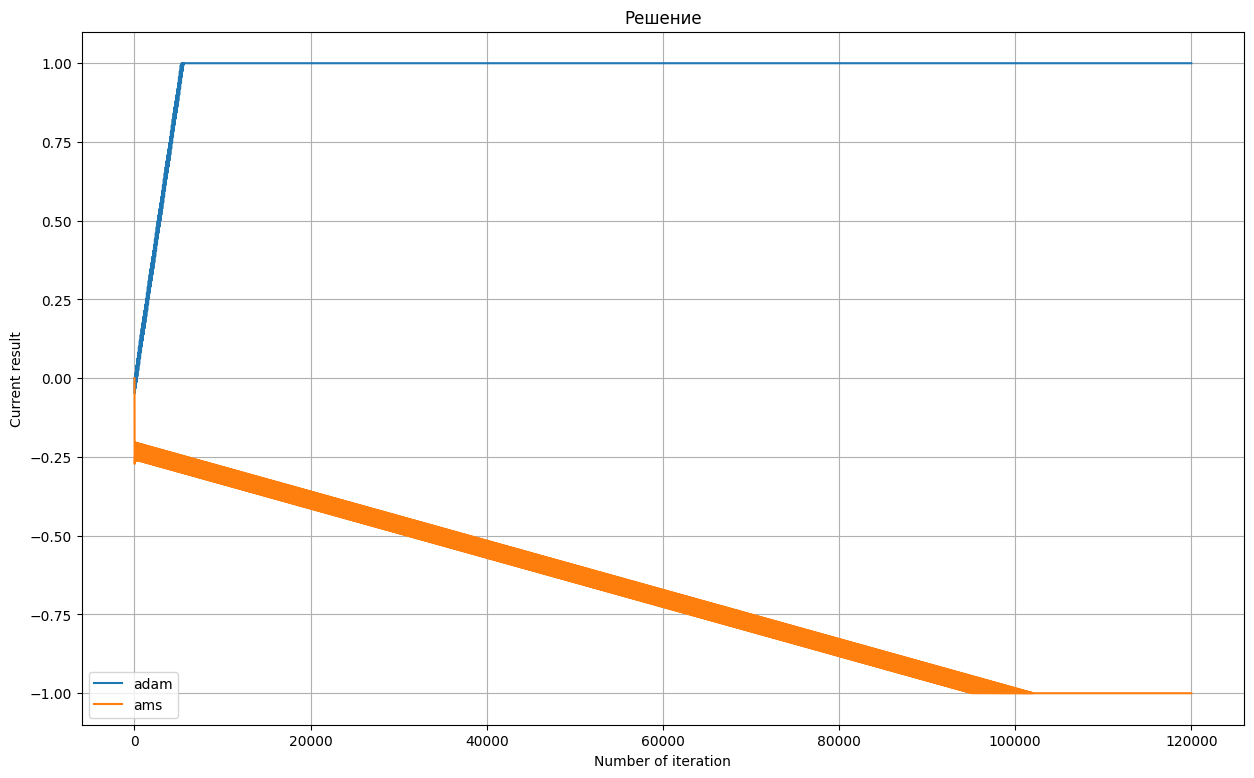

In [ ]:
xes = np.linspace(0,N,N)
plt.figure(figsize=(15, 9))
plt.title(f"Решение")
plt.plot(xes, x_adam, label = "adam")
plt.plot(xes, x_ams, label = "ams")
plt.xlabel("Number of iteration", fontsize=10)
plt.ylabel("Current result", fontsize=10)

plt.grid()
plt.legend()
plt.show()

In [ ]:
f_adam_res = np.cumsum(f_adam)
f_ams_res = np.cumsum(f_ams)

In [ ]:
f_adam_res = [f_adam_res[k]/k for k in range(1, len(f_adam_res)) ]
f_ams_res = [f_ams_res[k]/k for k in range(1, len(f_ams_res)) ]

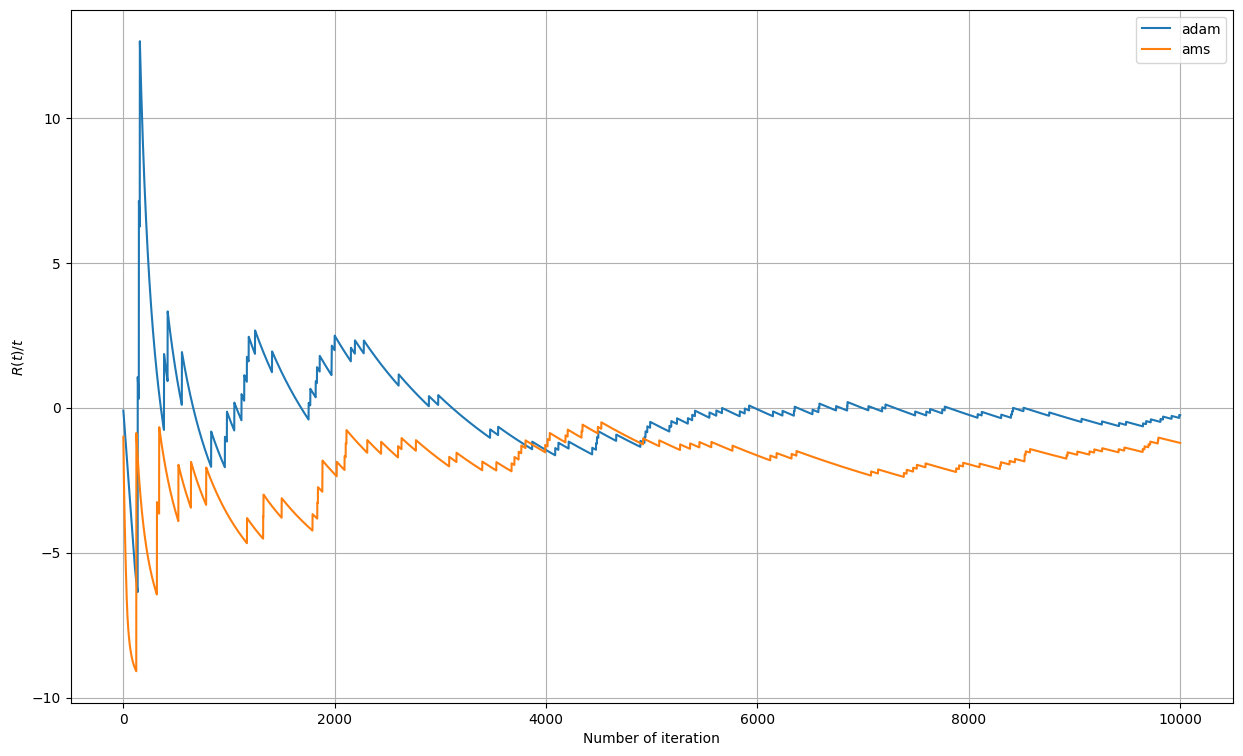

In [ ]:
xes = np.linspace(1,N,N-1)
plt.figure(figsize=(15, 9))
plt.plot(xes, f_adam_res, label = "adam")
plt.plot(xes, f_ams_res, label = "ams")
plt.xlabel("Number of iteration", fontsize=10)
plt.ylabel(f"$R(t)/t$", fontsize=10)

plt.grid()
plt.legend()
plt.show()

## Comparing ADAM and AMSGrad with neural networks on real datasets

### Fully-connected NN on MNIST

In [ ]:
import torch
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 92190109.59it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36063022.87it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26399252.58it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16394603.07it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3, amsgrad=False)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    train_preds = mnist_net.forward(X_train)
    test_loss_history.append(loss(test_preds, y_test))
    train_loss_history.append(loss(train_preds, y_train))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9111, device='cuda:0')
tensor(0.9212, device='cuda:0')
tensor(0.9182, device='cuda:0')
tensor(0.9214, device='cuda:0')
tensor(0.9270, device='cuda:0')
tensor(0.9207, device='cuda:0')
tensor(0.9321, device='cuda:0')
tensor(0.9286, device='cuda:0')
tensor(0.9260, device='cuda:0')
tensor(0.9369, device='cuda:0')
tensor(0.9347, device='cuda:0')
tensor(0.9327, device='cuda:0')
tensor(0.9351, device='cuda:0')
tensor(0.9402, device='cuda:0')
tensor(0.9401, device='cuda:0')
tensor(0.9368, device='cuda:0')
tensor(0.9372, device='cuda:0')
tensor(0.9369, device='cuda:0')
tensor(0.9402, device='cuda:0')
tensor(0.9405, device='cuda:0')
tensor(0.9380, device='cuda:0')
tensor(0.9408, device='cuda:0')
tensor(0.9443, device='cuda:0')
tensor(0.9413, device='cuda:0')
tensor(0.9457, device='cuda:0')
tensor(0.9445, device='cuda:0')
tensor(0.9405, device='cuda:0')
tensor(0.9405, device='cuda:0')
tensor(0.9440, device='cuda:0')
tensor(0.9426, device='cuda:0')
tensor(0.9456, device='cuda:0')
tensor(0

In [ ]:
train_loss_history = [x.to('cpu').detach().numpy() for x in train_loss_history]
test_loss_history = [x.to('cpu').detach().numpy() for x in test_loss_history]

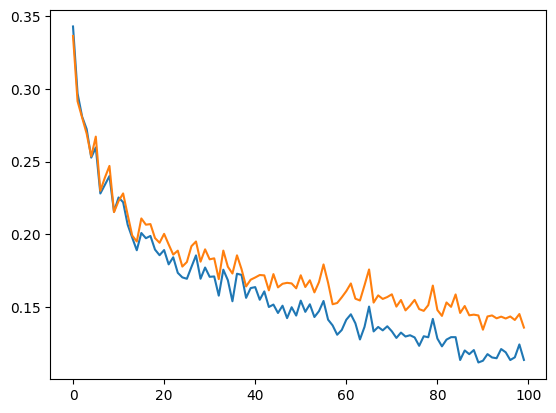

In [ ]:
plt.plot(train_loss_history)
plt.plot(test_loss_history);

In [ ]:
mnist_net = MNISTNet(100)
mnist_net = mnist_net.to(device)
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3, amsgrad=True)

In [ ]:
batch_size = 100

test_accuracy_history_ams = []
test_loss_history_ams = []
train_loss_history_ams = []

X_test = X_test.to(device)
y_test = y_test.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    train_preds = mnist_net.forward(X_train)
    test_loss_history_ams.append(loss(test_preds, y_test))
    train_loss_history_ams.append(loss(train_preds, y_train))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history_ams.append(accuracy)
    print(accuracy)

tensor(0.9136, device='cuda:0')
tensor(0.9077, device='cuda:0')
tensor(0.9135, device='cuda:0')
tensor(0.9242, device='cuda:0')
tensor(0.9240, device='cuda:0')
tensor(0.9230, device='cuda:0')
tensor(0.9254, device='cuda:0')
tensor(0.9270, device='cuda:0')
tensor(0.9277, device='cuda:0')
tensor(0.9282, device='cuda:0')
tensor(0.9380, device='cuda:0')
tensor(0.9334, device='cuda:0')
tensor(0.9357, device='cuda:0')
tensor(0.9397, device='cuda:0')
tensor(0.9365, device='cuda:0')
tensor(0.9406, device='cuda:0')
tensor(0.9333, device='cuda:0')
tensor(0.9370, device='cuda:0')
tensor(0.9382, device='cuda:0')
tensor(0.9403, device='cuda:0')
tensor(0.9420, device='cuda:0')
tensor(0.9403, device='cuda:0')
tensor(0.9429, device='cuda:0')
tensor(0.9454, device='cuda:0')
tensor(0.9441, device='cuda:0')
tensor(0.9411, device='cuda:0')
tensor(0.9428, device='cuda:0')
tensor(0.9489, device='cuda:0')
tensor(0.9455, device='cuda:0')
tensor(0.9435, device='cuda:0')
tensor(0.9436, device='cuda:0')
tensor(0

In [ ]:
train_loss_history_ams = [x.to('cpu').detach().numpy() for x in train_loss_history_ams]
test_loss_history_ams = [x.to('cpu').detach().numpy() for x in test_loss_history_ams]

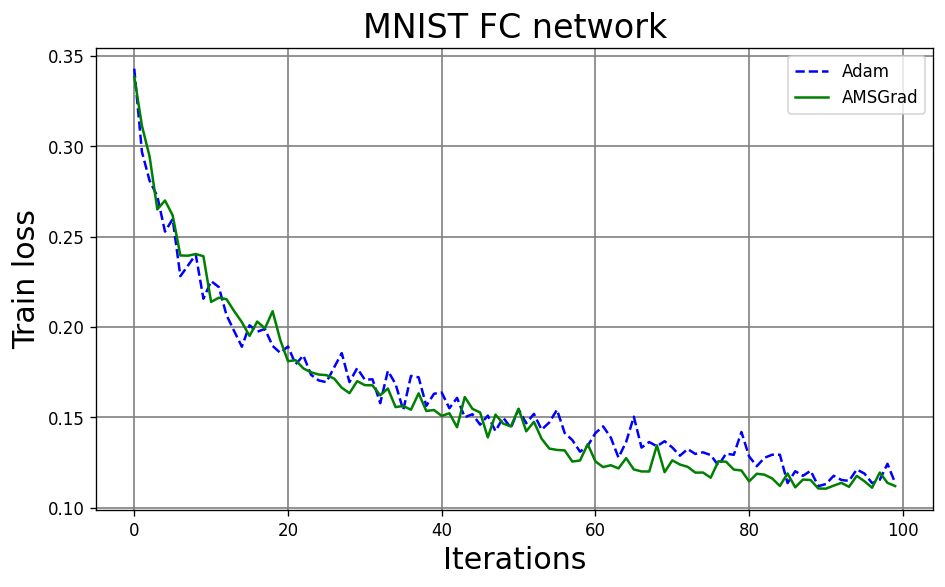

In [ ]:
plt.figure(figsize=(9, 5), dpi=120)

plt.plot(train_loss_history, '--', color='blue', label='Adam')
plt.plot(train_loss_history_ams, color='green', label='AMSGrad');

plt.ylabel("Train loss", fontsize=18)
plt.xlabel("Iterations", fontsize=18)
plt.title("MNIST FC network", fontsize=20)

plt.grid(which='major',color = 'gray', linewidth = 1)
plt.legend()

plt.show()

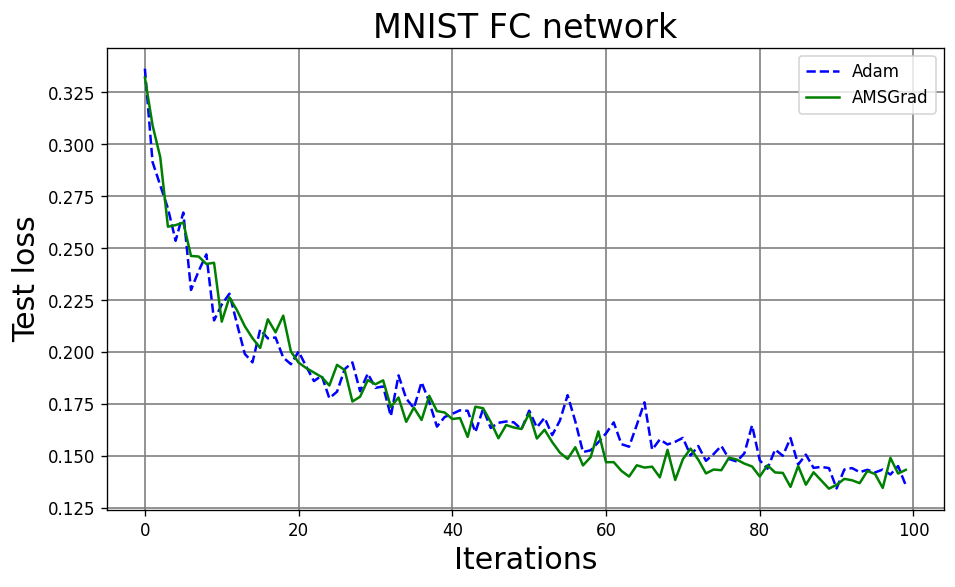

In [ ]:
plt.figure(figsize=(9, 5), dpi=120)

plt.plot(test_loss_history, '--', color='blue', label='Adam')
plt.plot(test_loss_history_ams, color='green', label='AMSGrad');

plt.ylabel("Test loss", fontsize=18)
plt.xlabel("Iterations", fontsize=18)
plt.title("MNIST FC network", fontsize=20)

plt.grid(which='major',color = 'gray', linewidth = 1)
plt.legend()

plt.show()

### CNN on CIFAR

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

100%|██████████| 170498071/170498071 [00:01<00:00, 104566540.49it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
X_train /= 255.
X_test /= 255.

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

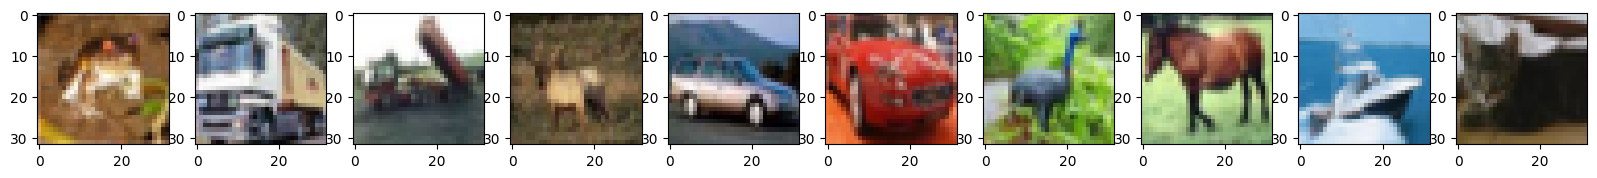

In [ ]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5,
                 use_batch_norm=False):
        super(LeNet5, self).__init__()

        self.conv_size = conv_size
        self.use_batch_norm = use_batch_norm

        if activation == 'tanh':
            activation_function = torch.nn.Tanh()
        elif activation == 'relu':
            activation_function  = torch.nn.ReLU()
        else:
            raise NotImplementedError

        if pooling == 'avg':
            pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError

        if conv_size == 5:
            self.conv1 = torch.nn.Conv2d(
                in_channels=3, out_channels=6, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(
                in_channels=3, out_channels=6, kernel_size=3, padding=0)
            self.conv1_2 = torch.nn.Conv2d(
                in_channels=6, out_channels=6, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act1 = activation_function
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.pool1 = pooling_layer

        if conv_size == 5:
            self.conv2 = self.conv2 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = torch.nn.Conv2d(
                in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function
        self.bn2 = torch.nn.BatchNorm2d(num_features=16)
        self.pool2 = pooling_layer

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = activation_function

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = activation_function

        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.pool1(x)

        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

In [ ]:
def train(net, X_train, y_train, X_test, y_test, amsgrad=False):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3, amsgrad=amsgrad)

    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []
    train_loss_history = []

    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

            X_batch

        net.eval()
        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

        train_preds = net.forward(X_train)
        train_loss_history.append(loss(train_preds, y_train).data.cpu())

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(accuracy)
    del net
    return train_loss_history, test_loss_history

In [ ]:
train_loss_history_adam, test_loss_history_adam = train(LeNet5(activation='relu', conv_size=3, pooling='max'),
          X_train, y_train, X_test, y_test, amsgrad=False)

tensor(0.3606)
tensor(0.4500)
tensor(0.4658)
tensor(0.4941)
tensor(0.5010)
tensor(0.5217)
tensor(0.5339)
tensor(0.5618)
tensor(0.5819)
tensor(0.5877)
tensor(0.5915)
tensor(0.5961)
tensor(0.6117)
tensor(0.6100)
tensor(0.6189)
tensor(0.6190)
tensor(0.6155)
tensor(0.6279)
tensor(0.6226)
tensor(0.6162)
tensor(0.6322)
tensor(0.6180)
tensor(0.6223)
tensor(0.6265)
tensor(0.6245)
tensor(0.6244)
tensor(0.6276)
tensor(0.6219)
tensor(0.6261)
tensor(0.6152)


In [ ]:
train_loss_history_ams, test_loss_history_ams = train(LeNet5(activation='relu', conv_size=3, pooling='max'),
          X_train, y_train, X_test, y_test, amsgrad=True)

tensor(0.3790)
tensor(0.4658)
tensor(0.4987)
tensor(0.5259)
tensor(0.5591)
tensor(0.5621)
tensor(0.5725)
tensor(0.5743)
tensor(0.5916)
tensor(0.5876)
tensor(0.5949)
tensor(0.5904)
tensor(0.5980)
tensor(0.6067)
tensor(0.6053)
tensor(0.6053)
tensor(0.6156)
tensor(0.6156)
tensor(0.6132)
tensor(0.6014)
tensor(0.6147)
tensor(0.6175)
tensor(0.6181)
tensor(0.6236)
tensor(0.6181)
tensor(0.6166)
tensor(0.6258)
tensor(0.6170)
tensor(0.6165)
tensor(0.6238)


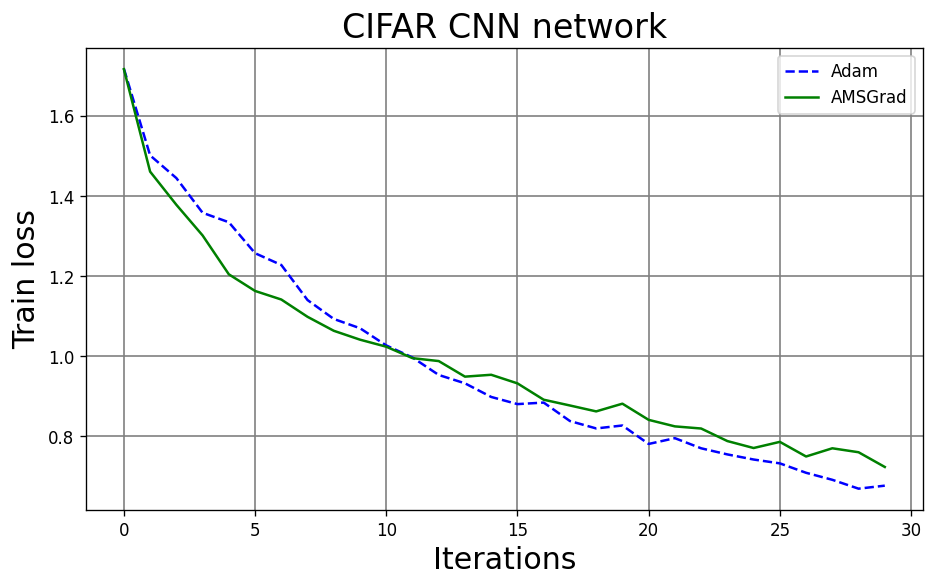

In [ ]:
plt.figure(figsize=(9, 5), dpi=120)

plt.plot(train_loss_history_adam, '--', color='blue', label='Adam')
plt.plot(train_loss_history_ams, color='green', label='AMSGrad');

plt.ylabel("Train loss", fontsize=18)
plt.xlabel("Iterations", fontsize=18)
plt.title("CIFAR CNN network", fontsize=20)

plt.grid(which='major',color = 'gray', linewidth = 1)
plt.legend()

plt.show()

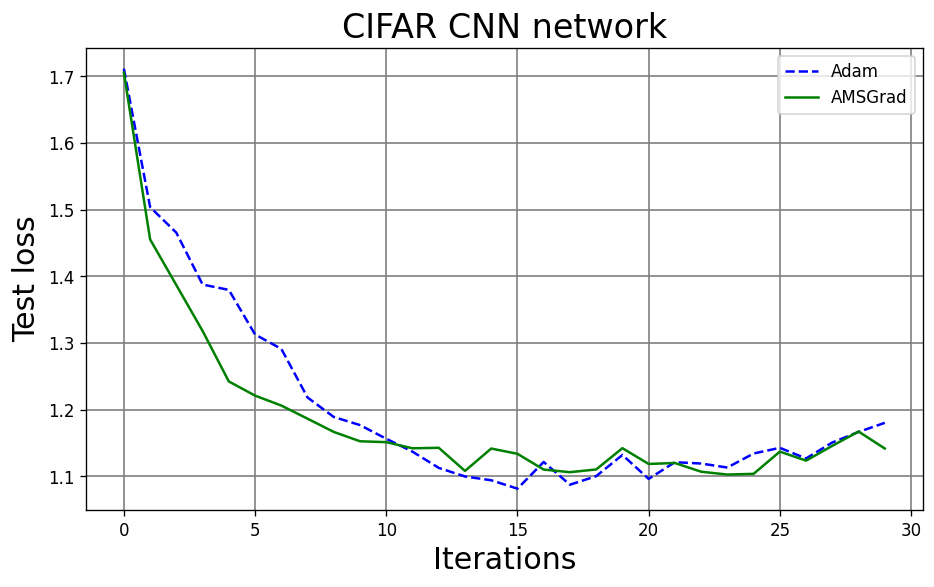

In [ ]:
plt.figure(figsize=(9, 5), dpi=120)

plt.plot(test_loss_history_adam, '--', color='blue', label='Adam')
plt.plot(test_loss_history_ams, color='green', label='AMSGrad');

plt.ylabel("Test loss", fontsize=18)
plt.xlabel("Iterations", fontsize=18)
plt.title("CIFAR CNN network", fontsize=20)

plt.grid(which='major',color = 'gray', linewidth = 1)
plt.legend()

plt.show()